## Analyze A/B Test Results Project


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

In this project, I am going to perform A/B test on my data. Before performing the test, I take a good look at the data structure see if there is any need to clean my data. Then I am going to dive into my project to get started. My project is divided into several parts. For the first part, I am going to calcualte the probability then I will do the A/B test. Finally, I will use the regression model to check if I would get the same results. 


<a id='probability'></a>
#### Part I - Probability

To get started, import my libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

#Now, read in the 'ab_data.csv' data. Store it as df ; then take look at the first several rows of my data

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


*Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

*The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

*The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

*The number of times the 'new_page' and 'treatment' don't match.

In [6]:
df.query("group =='treatment' and landing_page == 'old_page'").count()[0]

1965

*trying to find missing values of data

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


#none of the row has missing values from the information obove. 

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df.query("group =='control' and landing_page == 'new_page'")

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [9]:
g1=df.drop(df.query("group =='control' and landing_page == 'new_page'").index)

In [10]:
df2= g1.drop(g1.query("group=='treatment' and landing_page=='old_page'").index)

In [11]:
print(df2)

        user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
...         ...                         ...        ...          ...        ...
294473   751197  2017-01-03 22:28:38.630509    control     old_page          0
294474   945152  2017-01-12 00:51:57.078372    control     old_page          0
294475   734608  2017-01-22 11:45:03.439544    control     old_page          0
294476   697314  2017-01-15 01:20:28.957438    control     old_page          0
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page          0

[290585 rows x 5 columns]


In [12]:
# Double Check all of the correct rows were removed
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

*below are how many unique "user_ids"  in df2 

In [13]:
df2['user_id'].nunique()

290584

#check duplicates

In [14]:
df2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477    False
Length: 290585, dtype: bool

In [15]:
mask = df2.user_id.duplicated(keep=False)
print(df2[mask])

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


#Here is the row information for the repeat user_id: 2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

#decide to remove one of the rows, either of them is fine; row2893 removed

In [16]:
df2=df2.drop([2893])

In [17]:
print(df2)

        user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
...         ...                         ...        ...          ...        ...
294473   751197  2017-01-03 22:28:38.630509    control     old_page          0
294474   945152  2017-01-12 00:51:57.078372    control     old_page          0
294475   734608  2017-01-22 11:45:03.439544    control     old_page          0
294476   697314  2017-01-15 01:20:28.957438    control     old_page          0
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page          0

[290584 rows x 5 columns]


#below is the probability of an individual converting regarless of the page they receive 

In [18]:
df2['converted'].mean()

0.11959708724499628

#the probability of an individual converting given that an individual was in the control group, 

In [19]:
control_group=df2.query('group=="control"')['converted'].mean()
control_group

0.1203863045004612

#the probability of an individual converting given that an individual was in the treatment  group, 

In [20]:
treat_group=df2.query('group=="treatment"')['converted'].mean()
treat_group

0.11880806551510564

#the probability that an individual received the new page

In [21]:
df2.query('landing_page=="new_page"').count()[0]/df2.shape[0]

0.5000619442226688

#here is the observed difference between 2 groups

In [22]:
obs_diff=treat_group-control_group
obs_diff


-0.0015782389853555567

#from the calculation I did above, I found that coversion rate for control group is higher than the conversion rate for treatment group. But the data I get above is not enough to conclude that new treatment does not lead to connversions. I still need to run the hypothesis test to back my conclusion 

<a id='ab_test'></a>
### Part II - A/B Test


#Assuming the Type I error is 5% in my hypothesis test, which means the  alpha should is 0.05. For proving conversion rate for new page(𝑝𝑛𝑒𝑤 ) is better than coversion rate for old_page, my alternative hypothesis would be 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0, my null hypothesis would be  𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <= 0

#below is the conversion rate of old page(pold) and new age (pnew) under the null hypothesis

In [23]:
df2['converted'].mean()

0.11959708724499628

#n_new is the number of individuals in the treatment group

In [24]:
n_new=df2.query('group=="treatment"').count()[0]
n_new

145310

#n_old is the number of individuals in the control group 

In [25]:
n_old=df2.query('group=="control"').count()[0]
n_old

145274

#simulate n_new transactions with conversion rate of P_new under the null, store the value to the dataframe named'new_ page_converted'

In [26]:
treat_1=df2.query('group=="treatment"')
treat_1

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


#below bootstrappping sample 100000 times from the treat_1 group which contrain only treatment group; calculated the proportion of getting converted under the treatment group

In [27]:
size=n_new
pnew = []
for _ in range(10000):
    b_samp=treat_1.sample(size, replace=True)
    pnewmean=b_samp['converted'].mean()
    pnew.append(pnewmean)


    
    
    

In [28]:
new_page_converted=np.array(pnew)
new_page_converted

array([0.11838827, 0.12056982, 0.12061799, ..., 0.11794784, 0.11871172,
       0.11876677])

Simulate n_old transactions with a conversion rate of p_old under the null. 

In [29]:
control_1=df2.query('group=="control"')

#below bootstrappping sample 100000 times from the treat_1 group which contrain only treatment group; calculated the proportion of getting converted under the treatment group

In [30]:
size=n_old
pold = []
for _ in range(10000):
    a_samp=control_1.sample(size, replace=True)
    poldmean=a_samp['converted'].mean()
    pold.append(poldmean)



#convert value of pold in into an array then stored it as old_page_converted 

In [31]:
old_page_converted=np.array(pold)
old_page_converted

array([0.12025552, 0.12008343, 0.12086127, ..., 0.11982185, 0.11974613,
       0.12082685])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
new_page_converted-old_page_converted

array([-0.00186724,  0.00048639, -0.00024328, ..., -0.00187402,
       -0.00103442, -0.00206008])

#Create 10,000 p_new - P_old values using the same simulation process you used above. Store all 10,000 values in a NumPy array called called 'p_diffs'

In [33]:
diffs= []
for _ in range(10000):
    control_g=control_1.sample(n_old, replace=True)
    treat_g=treat_1.sample(n_new,replace=True)
    control_mean=control_g['converted'].mean()
    treat_mean=treat_g['converted'].mean()
    diffs.append (treat_mean -control_mean)
    

    

In [34]:
p_diffs=np.array(diffs)

#Plot a histogram of the 'p_diffs'. The plot is very close to normal distribution.

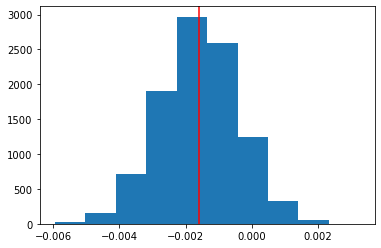

In [35]:
plt.hist(diffs)
plt.axvline(x=obs_diff, color='red')

#simulate a normal distribution based on the mean of the null, standard deviation of sample (here is p_diffs) . Because our null hypothesis is that mean=0 (which means no difference between the conversion rate on new page and conversion rate on old page, so simulate a normal distribution with mean equal to 0 


In [36]:
null_vals=np.random.normal(0, p_diffs.std(), p_diffs.size)

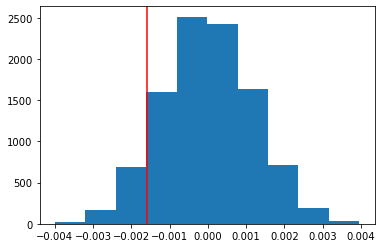

In [37]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [38]:
(null_vals > obs_diff).mean()

0.9083

#from the p value 0.9011, we can conclude that about 90% null value for p_diffs are greater than obs_diff.

***I calculated the p values which is 0.9011 which is very high. Because the type I error I set is 0.05. So if the p value here is smaller than 0.05, then I can reject the null hypothesis. But in this case, P value is too big, I cannot reject the null hypothesis. So there is no difference between the new and old pages. 

##In the section below, I am going to use a built-in to achieve similar results. here number_old, number_new refer the number of rows associted with the old page and new page respectively. 


In [39]:
import statsmodels.api as sm

convert_old = df2.query('group=="control"')['converted'].sum()
convert_new = df2.query('group=="treatment"')['converted'].sum()
number_old =df2.query('group=="control"').count()[0]
number_new = df2.query('group=="treatment"').count()[0]

#use stats.proportions_ztest to compute the test statistics and p value

In [40]:
# computing p-value and z-score using stats.proportions_ztest
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value


(1.3109241984234394, 0.9050583127590245)

#From the calculation above, the z score is 1.31 and p value is 0.9050. The p value is similar compared to the one that obtained from the normal distribution with mean=0. The z score tells me that 1.31 standard deviation from the mean p_diffs values fall. The p vlaue is too big compared to my type I error of 0.05. So based on the calculation from built_in model, fail to reject the null hypothesis, conclude that there is no difference of conversion rate between old_page and new_page


<a id='regression'></a>
### Part III - A regression approach

In this final part, I am going to explore the relationship between page_landing and conversion happening using regression model. Because my response (dependent variable) is either a conversion or no conversion which is considered categorical, I  use logistic regression in this case


#first, created dummy variable column for the variable "landing_page" named as ab_page and old_page, but no need old_page, which is excessive, decided to drop it, The new dummy variable that named ab_page, having new_page (treatment group) =1  and old_page (control group) = 0


In [41]:
df[['ab_page','old_page']] = pd.get_dummies(df['landing_page'])
df=df.drop('old_page', axis=1)
df.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


# Logistic regression model 

#to use logistic regression model, need statsmodels; import statsmodels 

In [42]:
import statsmodels.api as sm 

#run the logistic regression on response variable ('converted') and x ('ab_page'); Addiing the intercept first when runing the regresssion 

In [43]:
df['intercept'] = 1
logit_mod = sm.Logit(df['converted'], df[['intercept','ab_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366242
         Iterations 6


#here is the summary of logistic regression model 

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:               8.680e-06
Time:                        10:24:34   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1712
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9879      0.008   -248.305      0.000      -2.004      -1.972
ab_page       -0.0155      0.011     -1.368      0.171      -0.038       0.007
==============================================================================
"""

#To interpret the coefficient in logistic regression model, we first need to exponentiate our coefficient

In [45]:
np.exp(-0.0155)

0.9846195067517329

The intepretation of coefficient for ab_page is that conversion is less likely on new_page than on old_page holding all else constant 

#Because our returned value <1, so it is beneficial to obtain the reciporcal which would change the unit of increase to unit of decrease

In [46]:
1/np.exp(-0.0155)

1.0156207480583108

#The intepretation of reciprocal coefficient for ab_page is that if the new_page decrease 1 unit, then conversion is 1 time as likely holding all else constant

#p value associated with ab_page is 0.171. Which is too big to be significant. The null hypothesis of my regression model is that coefficient of ab_page is not statistically significant for my regression model when holding everything alse constant. And my alternative hypothesis is that coefficent of ab_page is significant when holding anything else constant. 

#it is better to consider other factors to add into my regression model. Because based on what we know ab_page is not statistically significant to explore our response (y), we need find other factors that may affect conversion. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

#import another dataset named 'countries.csv'; take look at the data strcture of this dataset 

In [47]:
import pandas as pd 
df_country=pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


#trying to find how many unique values in the variable country

In [48]:
df_country['country'].nunique()

3

#create dummy variables columns for the variable country. because there are 3 unique values, but one of them have to be used as baseline to compare in the regression model. so delete the column named CA. 

In [49]:
df_country[['UK','US', 'CA']] = pd.get_dummies(df_country['country'])
df_country=df_country.drop('CA', axis=1)
df_country.head()

,user_id,country,UK,US
0,834778,UK,0,1
1,928468,US,0,0
2,822059,UK,0,1
3,711597,UK,0,1
4,710616,UK,0,1


#join df2 dataframe with df_country dataframe by the key index named 'user_id'

In [50]:
df_new=df2.set_index('user_id').join(df_country.set_index('user_id'))
df_new.head()

,timestamp,group,landing_page,converted,country,UK,US
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,US,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,US,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,US,0,0


#create logit model on y dummy variable('converted') and x dummy variables ('US', 'UK); First, create the intercept first

In [51]:
df_new['intercept'] = 1
logit_mod2 = sm.Logit(df_new['converted'], df_new[['intercept','US', 'UK']])
results_2 = logit_mod2.fit()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [52]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:               1.521e-05
Time:                        10:24:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
US             0.0099      0.013      0.746      0.456      -0.016       0.036
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

In [53]:
np.exp(0.0099), np.exp(-0.0408)

(1.0099491671175422, 0.9600211149716509)

#From the summary above, we can see the p value for 'US', 'UK' are above 0.05, which means it is not statistically significant. So we cannot reject the null hypothesis. So the conclusion should be that the coefficient for the variable "country" is not statistically significant. 

# Conclusion: Based on the A/B test and logistic regression I did, the p value is too high to be rejected which means we cannnot reject the null hypothesis. In A/B test, our null hypothesis is that there is no difference between the conversion having old page and new page. Later, I run the logistic regression to see if the coefficient of new and old page page is statistially significant. But it proves that it is not that makes me  become pretty confident that there is no direct relationship between conversion and new or old page.  So I start to import another dataset to see if there is other factor my affect the conversion which here I use country. After running the regression, the coefficient for country isn't statistially significant. So may be there is other factor that may affect the conversion rate. 